In [ ]:
!pip install opencv-python matplotlib torch torchvision torchaudio
!pip install -q monodepth2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from google.colab import files
uploaded = files.upload() 

Saving istockphoto-616041938-640_adpp_is.mp4 to istockphoto-616041938-640_adpp_is.mp4


In [ ]:
import cv2

video_path = list(uploaded.keys())[0]  
cap = cv2.VideoCapture(video_path)

# Get total number of frames
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
middle_frame_num = total_frames // 2

# Set position to middle frame
cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame_num)

# Read middle frame
ret, frame = cap.read()
if ret:
    frame_path = "middle_frame.jpg"
    cv2.imwrite(frame_path, frame)
    print("Middle frame saved as", frame_path)
else:
    print("Error reading middle frame")

cap.release()


Middle frame saved as middle_frame.jpg


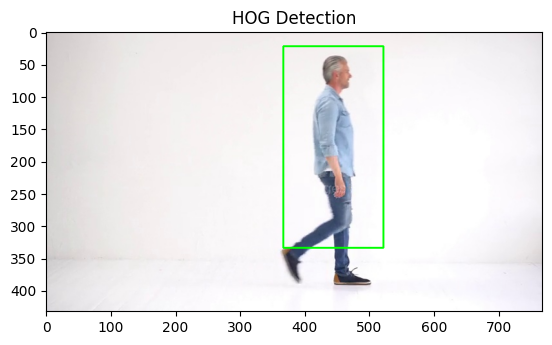

In [ ]:
import matplotlib.pyplot as plt

# Load saved middle frame
img = cv2.imread("middle_frame.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ----- HOG -----
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
boxes, _ = hog.detectMultiScale(gray, winStride=(8, 8))

img_hog = img.copy()
for (x, y, w, h) in boxes:
    cv2.rectangle(img_hog, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.subplot(1, 1, 1)
plt.title("HOG Detection")
plt.imshow(cv2.cvtColor(img_hog, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
!pip install mediapipe==0.10.10

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.8/34.8 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.
tensorflow-metadata 1.17.1 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.


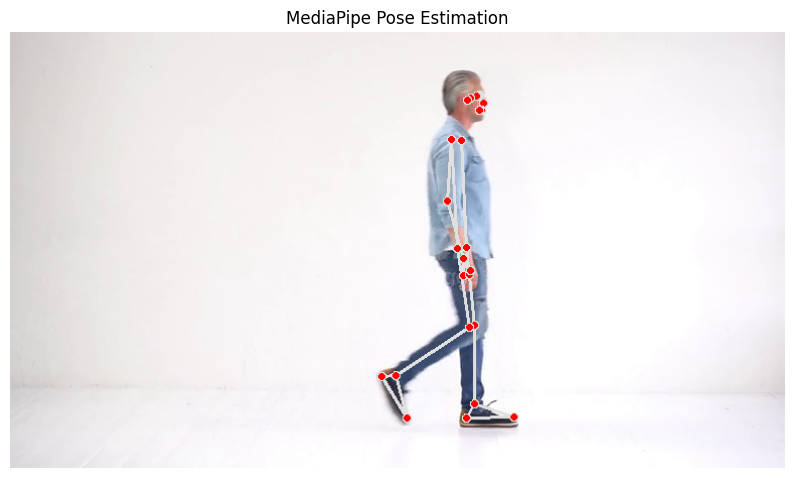

In [ ]:
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Load image
image = cv2.imread("middle_frame.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize MediaPipe Pose
with mp_pose.Pose(static_image_mode=True) as pose:
    results = pose.process(image_rgb)

# Draw pose landmarks
if results.pose_landmarks:
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

# Show result
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("MediaPipe Pose Estimation")
plt.axis("off")
plt.show()


In [ ]:
if results.pose_landmarks:
    landmarks = results.pose_landmarks.landmark
    keypoints = [(lm.x, lm.y, lm.z) for lm in landmarks]
    print("Detected", len(keypoints), "keypoints.")
    print("Example (x, y, z):", keypoints[0])


Detected 33 keypoints.
Example (x, y, z): (0.6117331981658936, 0.16213911771774292, -0.14792554080486298)


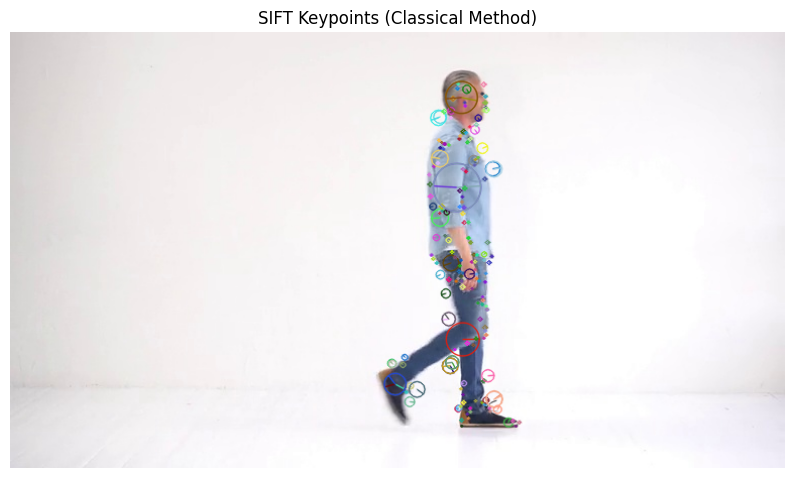

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the frame
image = cv2.imread("middle_frame.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# SIFT detector
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints
sift_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show result
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(sift_image, cv2.COLOR_BGR2RGB))
plt.title("SIFT Keypoints (Classical Method)")
plt.axis("off")
plt.show()


In [ ]:
print(f"Classical (SIFT) detected {len(keypoints)} keypoints.")
print(f"Deep Learning (MediaPipe) detected 33 body landmarks.")  # Always 33


Classical (SIFT) detected 198 keypoints.
Deep Learning (MediaPipe) detected 33 body landmarks.


[Frame 83] Nose 3D (x=0.142, y=-0.621, z=-0.140)


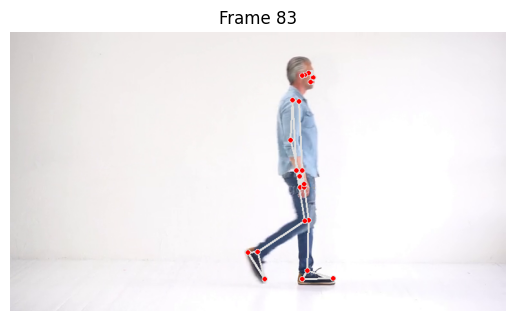

[Frame 84] Nose 3D (x=0.149, y=-0.621, z=-0.135)


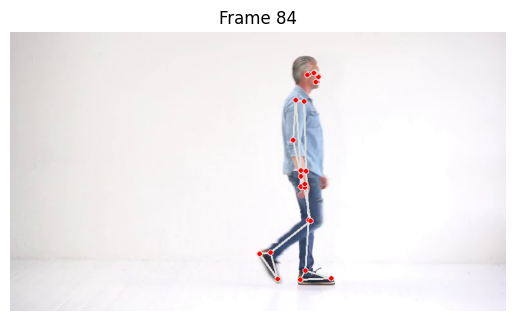

[Frame 85] Nose 3D (x=0.153, y=-0.623, z=-0.141)


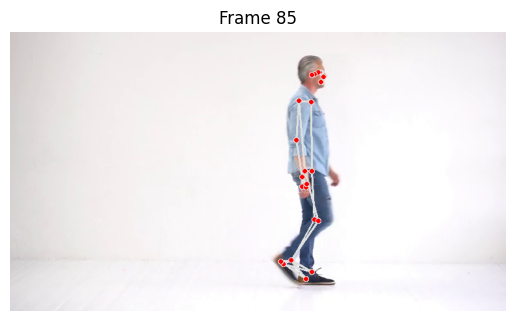

[Frame 86] Nose 3D (x=0.161, y=-0.622, z=-0.142)


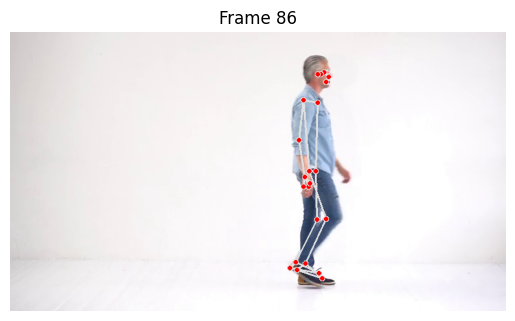

[Frame 87] Nose 3D (x=0.167, y=-0.623, z=-0.136)


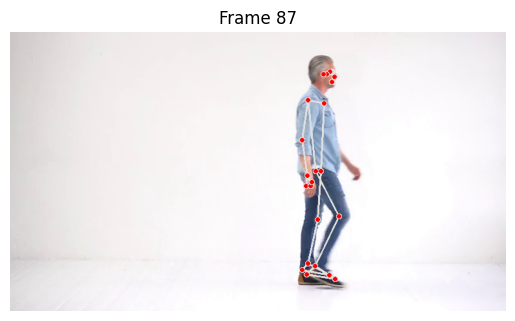

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
from matplotlib import pyplot as plt

# Initialize MediaPipe pose module
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Open video file
cap = cv2.VideoCapture(video_path)

# Get the total number of frames in the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Calculate the middle frame
middle_frame = total_frames // 2

# Pose Estimator
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Setup
frame_count = 0
cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame)  # Starts at the middle frame

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = pose.process(frame_rgb)

    # Draw 2D + 3D pose
    if result.pose_landmarks:
        mp_drawing.draw_landmarks(frame, result.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Print a few 3D coordinates for demonstration
        landmarks = result.pose_world_landmarks.landmark
        nose = landmarks[0]
        print(f"[Frame {middle_frame + frame_count}] Nose 3D (x={nose.x:.3f}, y={nose.y:.3f}, z={nose.z:.3f})")

    # Display 
    display_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(display_frame)
    plt.title(f"Frame {middle_frame + frame_count}")
    plt.axis('off')
    plt.show()

    # Break early for demo 
    if frame_count >= 5:
        break

cap.release()
pose.close()


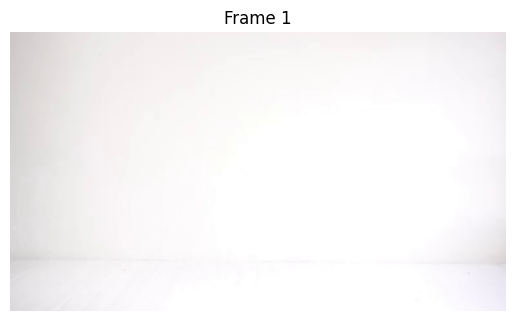

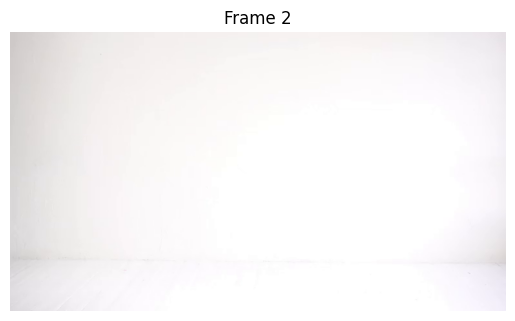

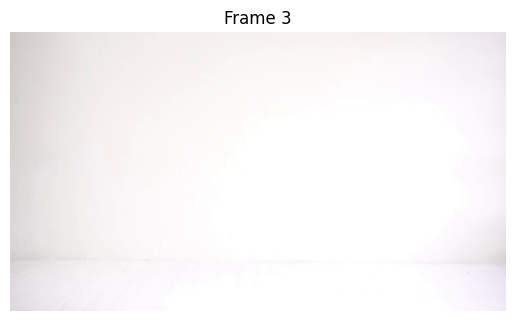

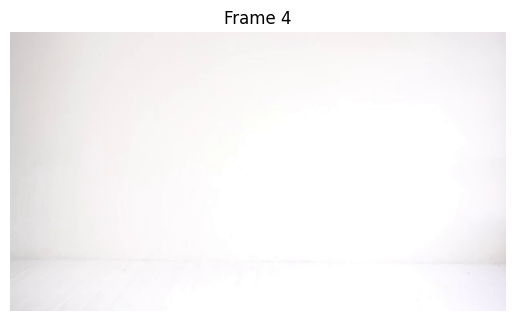

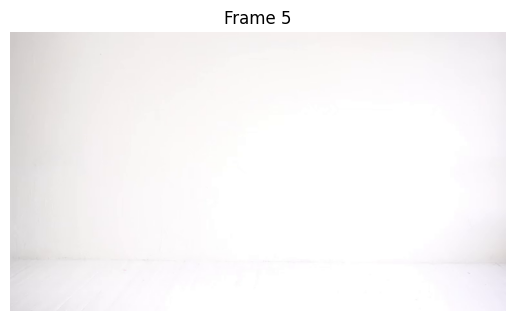

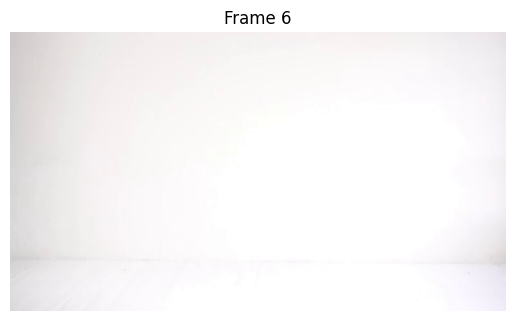

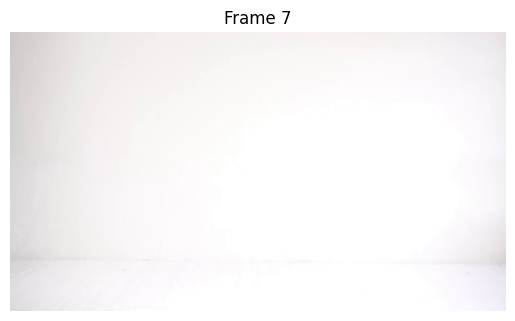

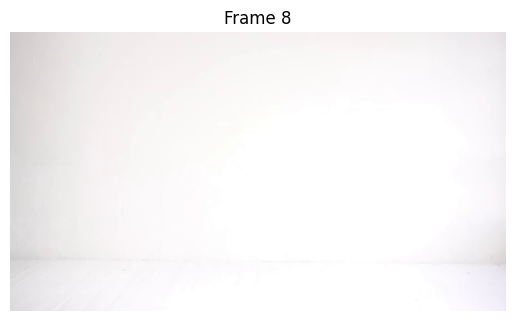

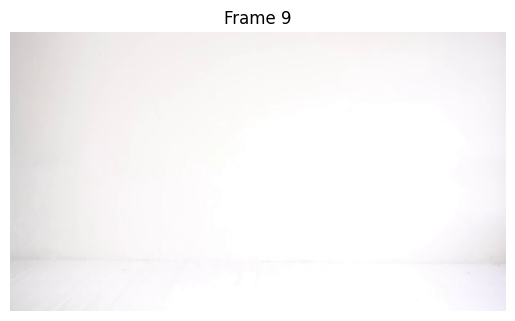

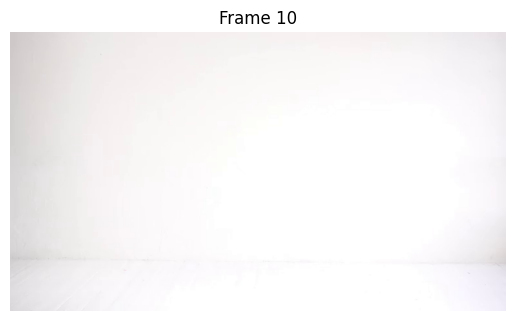

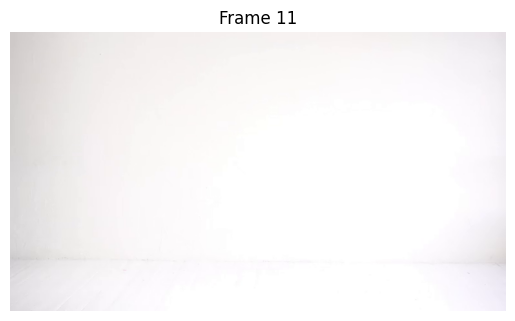

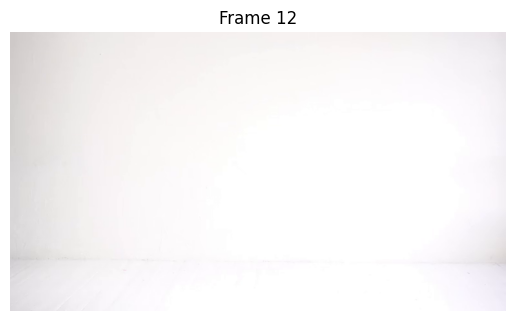

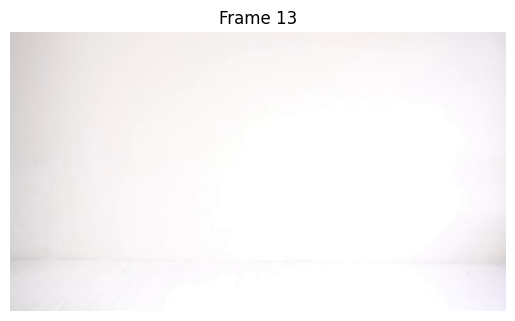

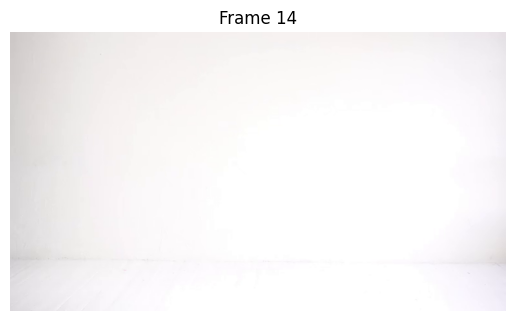

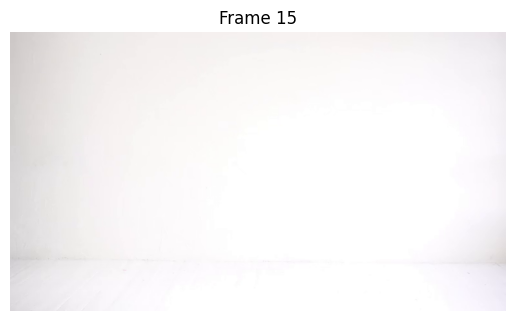

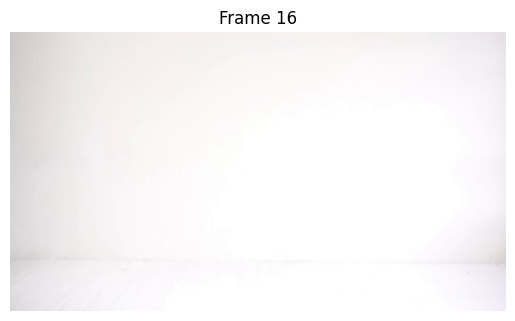

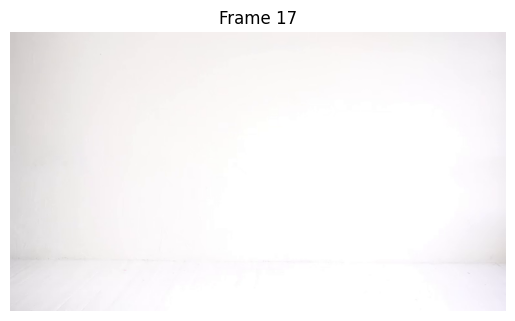

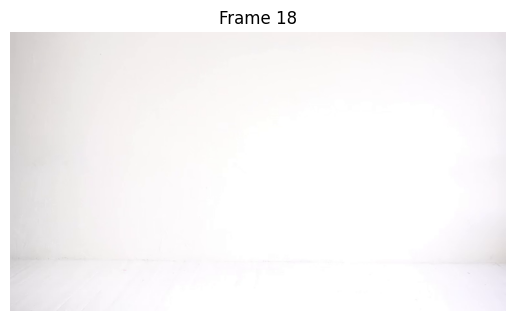

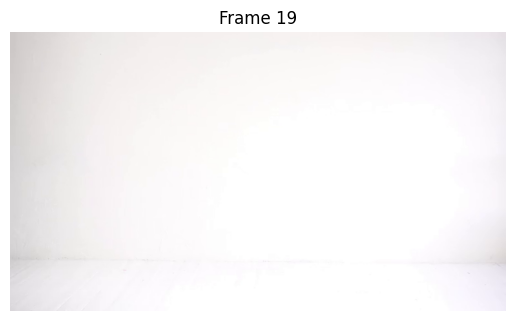

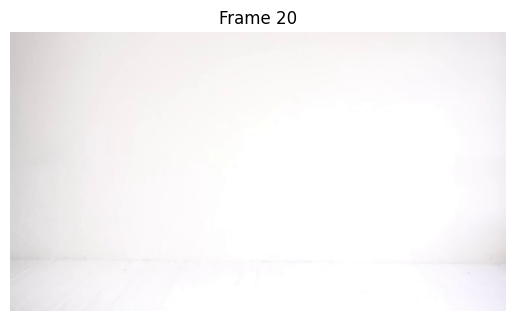

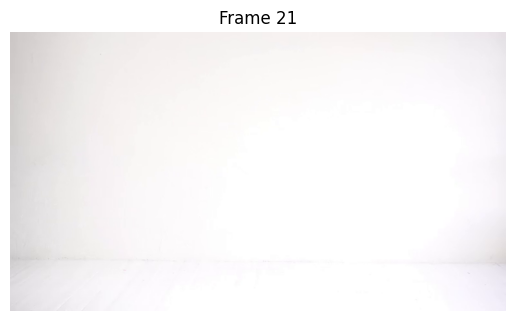

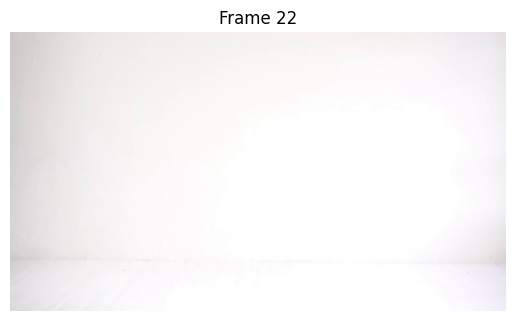

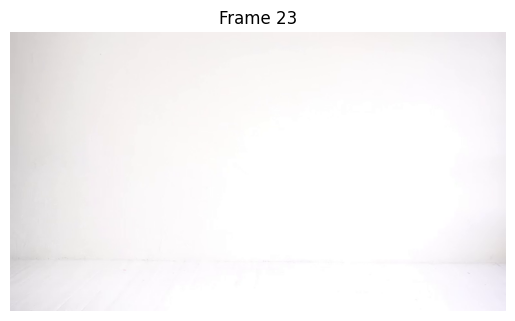

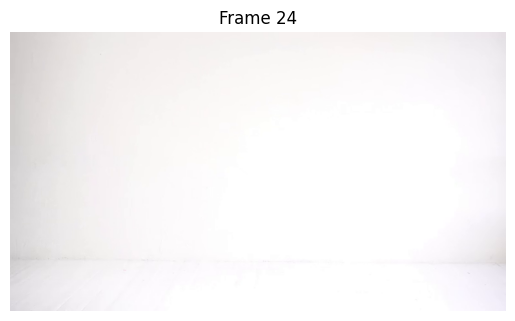

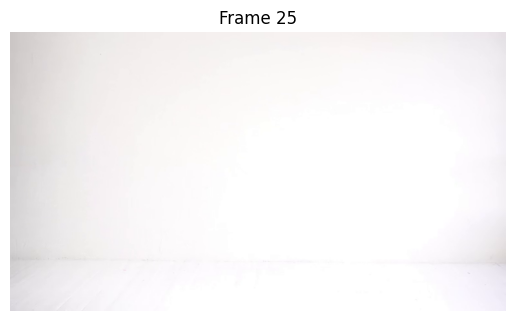

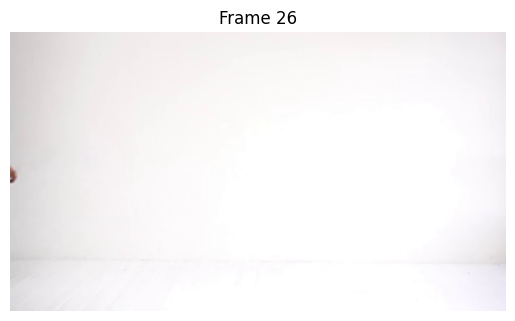

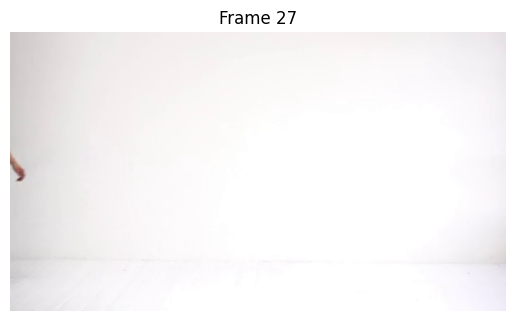

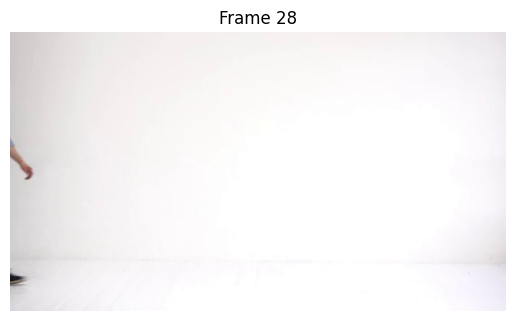

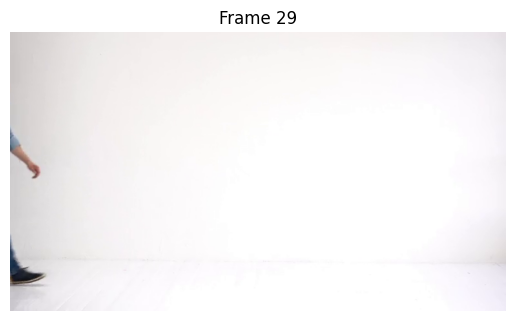

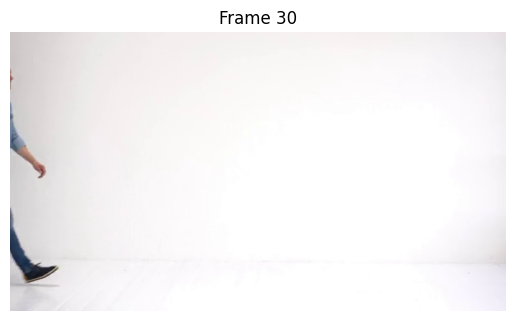

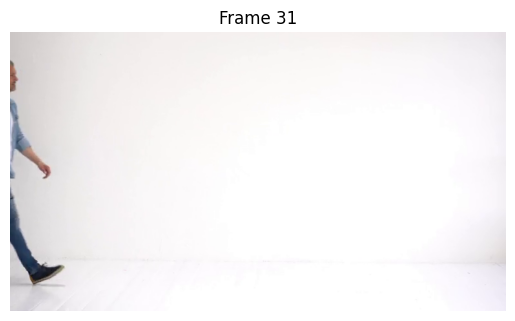

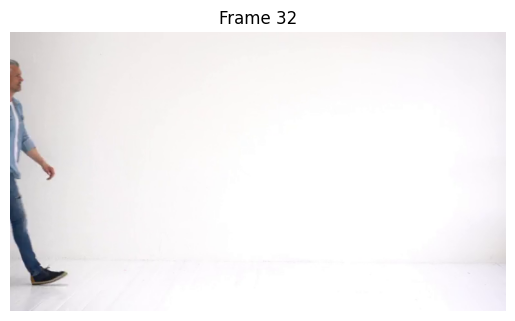

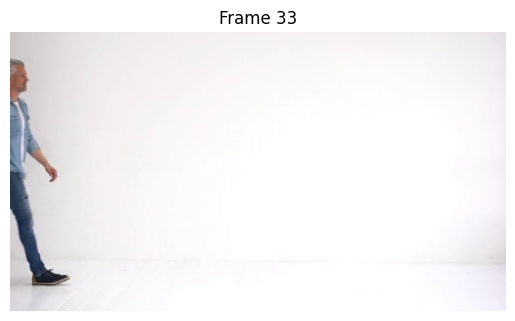

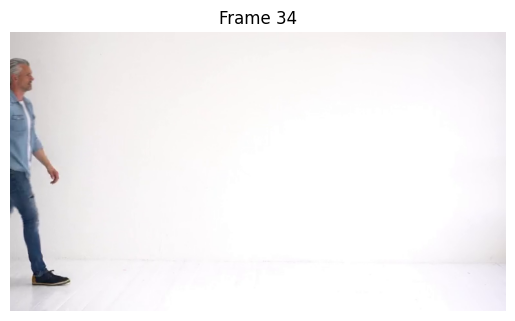

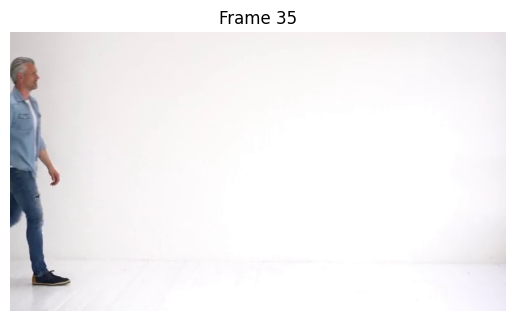

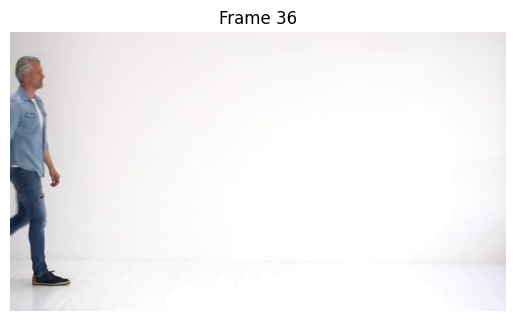

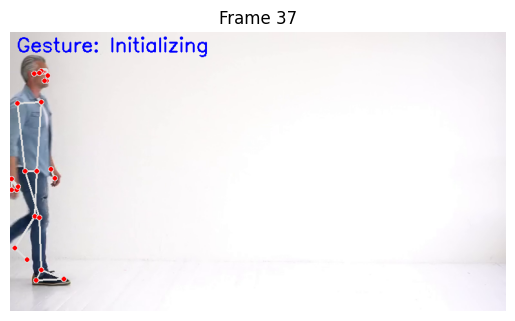

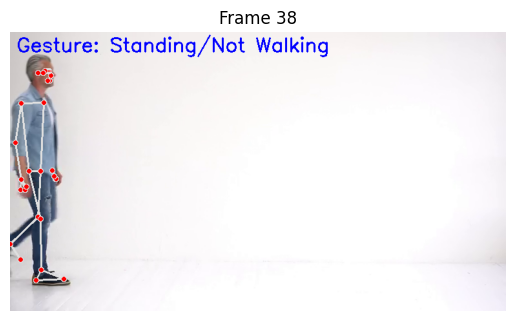

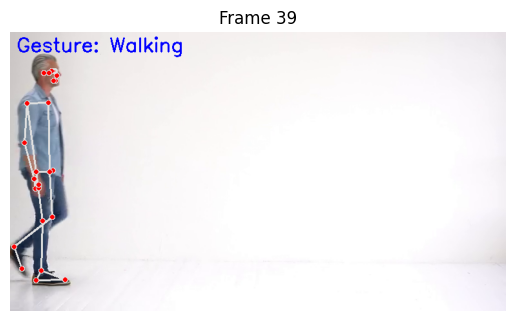

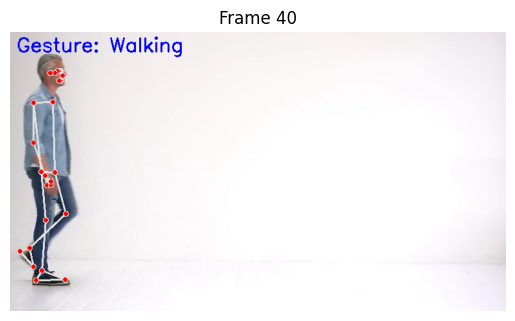

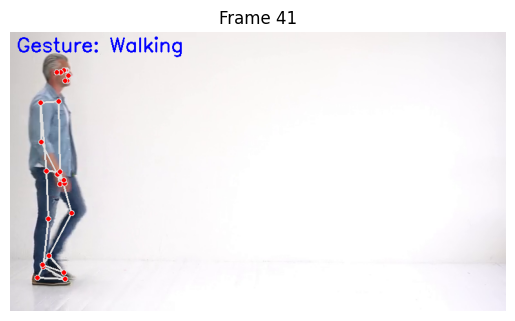

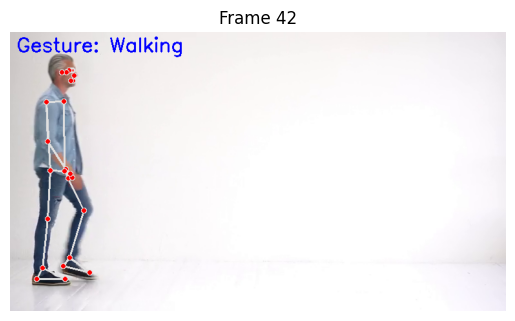

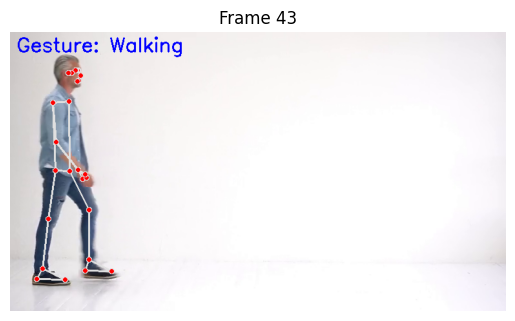

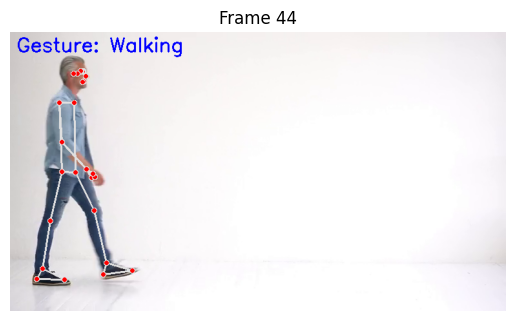

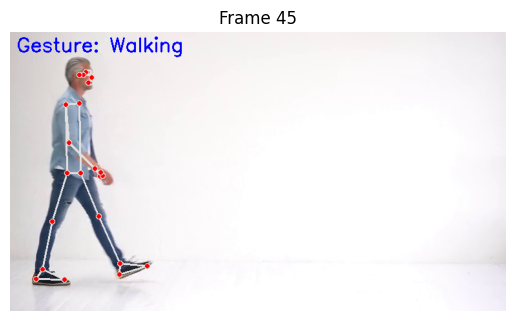

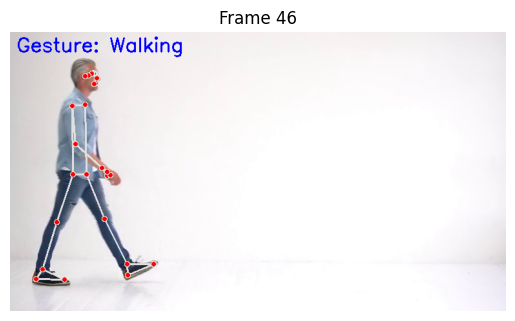

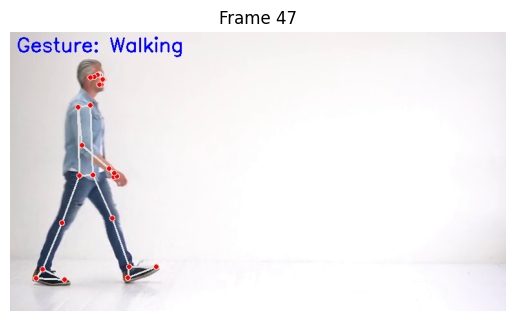

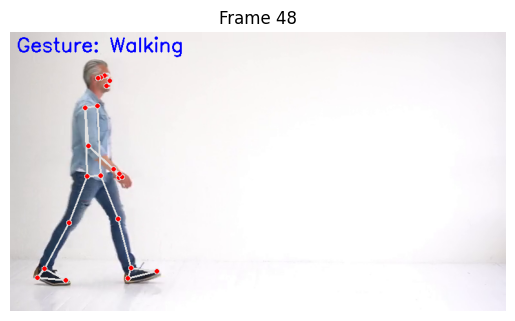

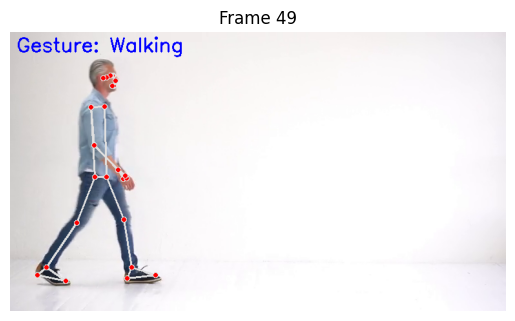

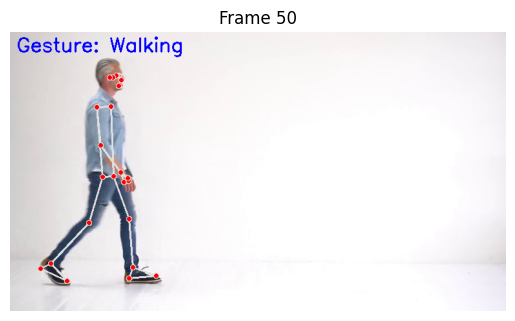

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
from matplotlib import pyplot as plt

# Initialize MediaPipe pose module
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Open video file
cap = cv2.VideoCapture(video_path)

# Pose Estimator
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

frame_count = 0

# Previous landmark positions for motion detection (initialization)
previous_hips = None
previous_knees = None

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = pose.process(frame_rgb)

    if result.pose_landmarks:
        # Draw pose landmarks
        mp_drawing.draw_landmarks(frame, result.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Extract specific landmarks for walking analysis (e.g., hips, knees)
        landmarks = result.pose_landmarks.landmark
        hip_left = landmarks[mp_pose.PoseLandmark.LEFT_HIP]
        hip_right = landmarks[mp_pose.PoseLandmark.RIGHT_HIP]
        knee_left = landmarks[mp_pose.PoseLandmark.LEFT_KNEE]
        knee_right = landmarks[mp_pose.PoseLandmark.RIGHT_KNEE]

        # Calculate distance or relative movement of hips/knees to determine if walking
        if previous_hips and previous_knees:
            # Calculate movement between current and previous positions (e.g., horizontal distance)
            hip_movement = np.abs((hip_left.x + hip_right.x) - (previous_hips[0] + previous_hips[1]))
            knee_movement = np.abs((knee_left.x + knee_right.x) - (previous_knees[0] + previous_knees[1]))

            # Heuristic rule for detecting walking (based on movement of hips and knees)
            if hip_movement > 0.01 and knee_movement > 0.01:
                gesture = "Walking"
            else:
                gesture = "Standing/Not Walking"
        else:
            gesture = "Initializing"

        # Update previous landmarks for next frame
        previous_hips = [hip_left.x, hip_right.x]
        previous_knees = [knee_left.x, knee_right.x]

        # Display detected gesture
        cv2.putText(frame, f'Gesture: {gesture}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Display the result frame
    display_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(display_frame)
    plt.title(f"Frame {frame_count}")
    plt.axis('off')
    plt.show()

    if frame_count >= 50:
        break

cap.release()
pose.close()


In [ ]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Initialize MediaPipe pose module
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Open video file or webcam
cap = cv2.VideoCapture(0)  

# Pose Estimator
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Process the frame for pose landmarks
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = pose.process(frame_rgb)

    # Draw pose landmarks on the frame
    if result.pose_landmarks:
        mp_drawing.draw_landmarks(frame, result.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # Display the frame using matplotlib (for headless environments)
    plt.imshow(frame)
    plt.axis('off')  # Hide axes
    plt.show()

    # Break the loop if the user presses 'q' (handled manually)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and pose object
cap.release()
pose.close()


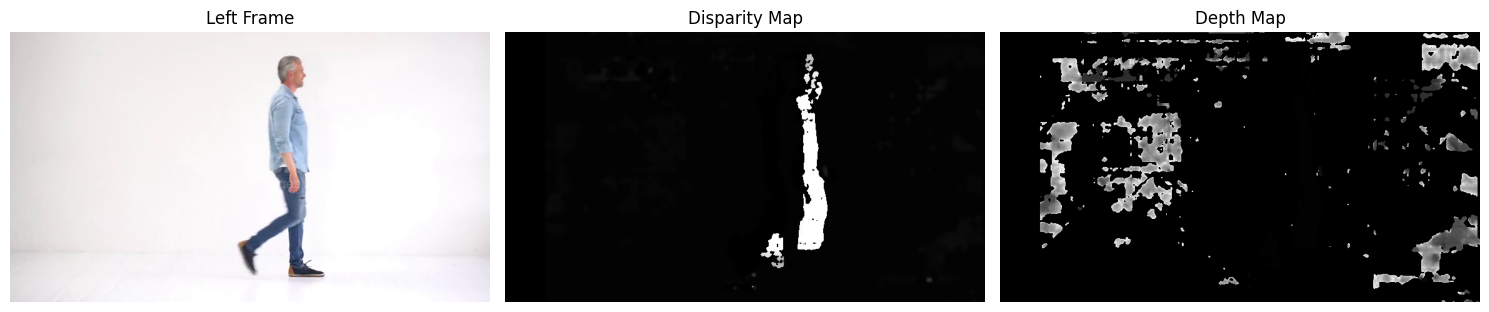

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
video_path = 'istockphoto-616041938-640_adpp_is.mp4' 
cap = cv2.VideoCapture(video_path)

frame_offset = 3               # Frame difference for right image
focal_length = 100.0           # Focal length in pixels
baseline = 0.1                 # Distance between views in meters

# --- GET FRAMES ---
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
middle_index = total_frames // 2
right_index = min(total_frames - 1, middle_index + frame_offset)

def get_frame(cap, frame_num):
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
    ret, frame = cap.read()
    return frame if ret else None

left_frame = get_frame(cap, middle_index)
right_frame = get_frame(cap, right_index)
cap.release()

# Convert to grayscale and enhance contrast
left_gray = cv2.cvtColor(left_frame, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_frame, cv2.COLOR_BGR2GRAY)

left_gray = cv2.equalizeHist(left_gray)
right_gray = cv2.equalizeHist(right_gray)

# --- COMPUTE DISPARITY ---
stereo = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=64,
    blockSize=7,
    P1=8 * 3 * 7 ** 2,
    P2=32 * 3 * 7 ** 2,
    disp12MaxDiff=1,
    uniquenessRatio=10,
    speckleWindowSize=100,
    speckleRange=32
)

disparity = stereo.compute(left_gray, right_gray).astype(np.float32) / 16.0

# --- FILTER INVALID DISPARITY ---
valid_disp = disparity > 0
depth = np.zeros_like(disparity, dtype=np.float32)
depth[valid_disp] = (focal_length * baseline) / disparity[valid_disp]

# --- VISUALIZE DISPARITY & DEPTH ---
disp_vis = cv2.normalize(disparity, None, 0, 255, cv2.NORM_MINMAX)
disp_vis = np.uint8(disp_vis)
disp_vis = cv2.bilateralFilter(disp_vis, 9, 75, 75)

# Normalize depth for visualization
depth_vis = cv2.normalize(depth, None, 0, 255, cv2.NORM_MINMAX)
depth_vis = np.uint8(depth_vis)

# --- DISPLAY ---
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Left Frame')
plt.imshow(cv2.cvtColor(left_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Disparity Map')
plt.imshow(disp_vis, cmap='grey')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Depth Map')
plt.imshow(depth_vis, cmap='grey')
plt.axis('off')

plt.tight_layout()
plt.show()
